# 

# **Superstore Sales Analysis Demonstration**

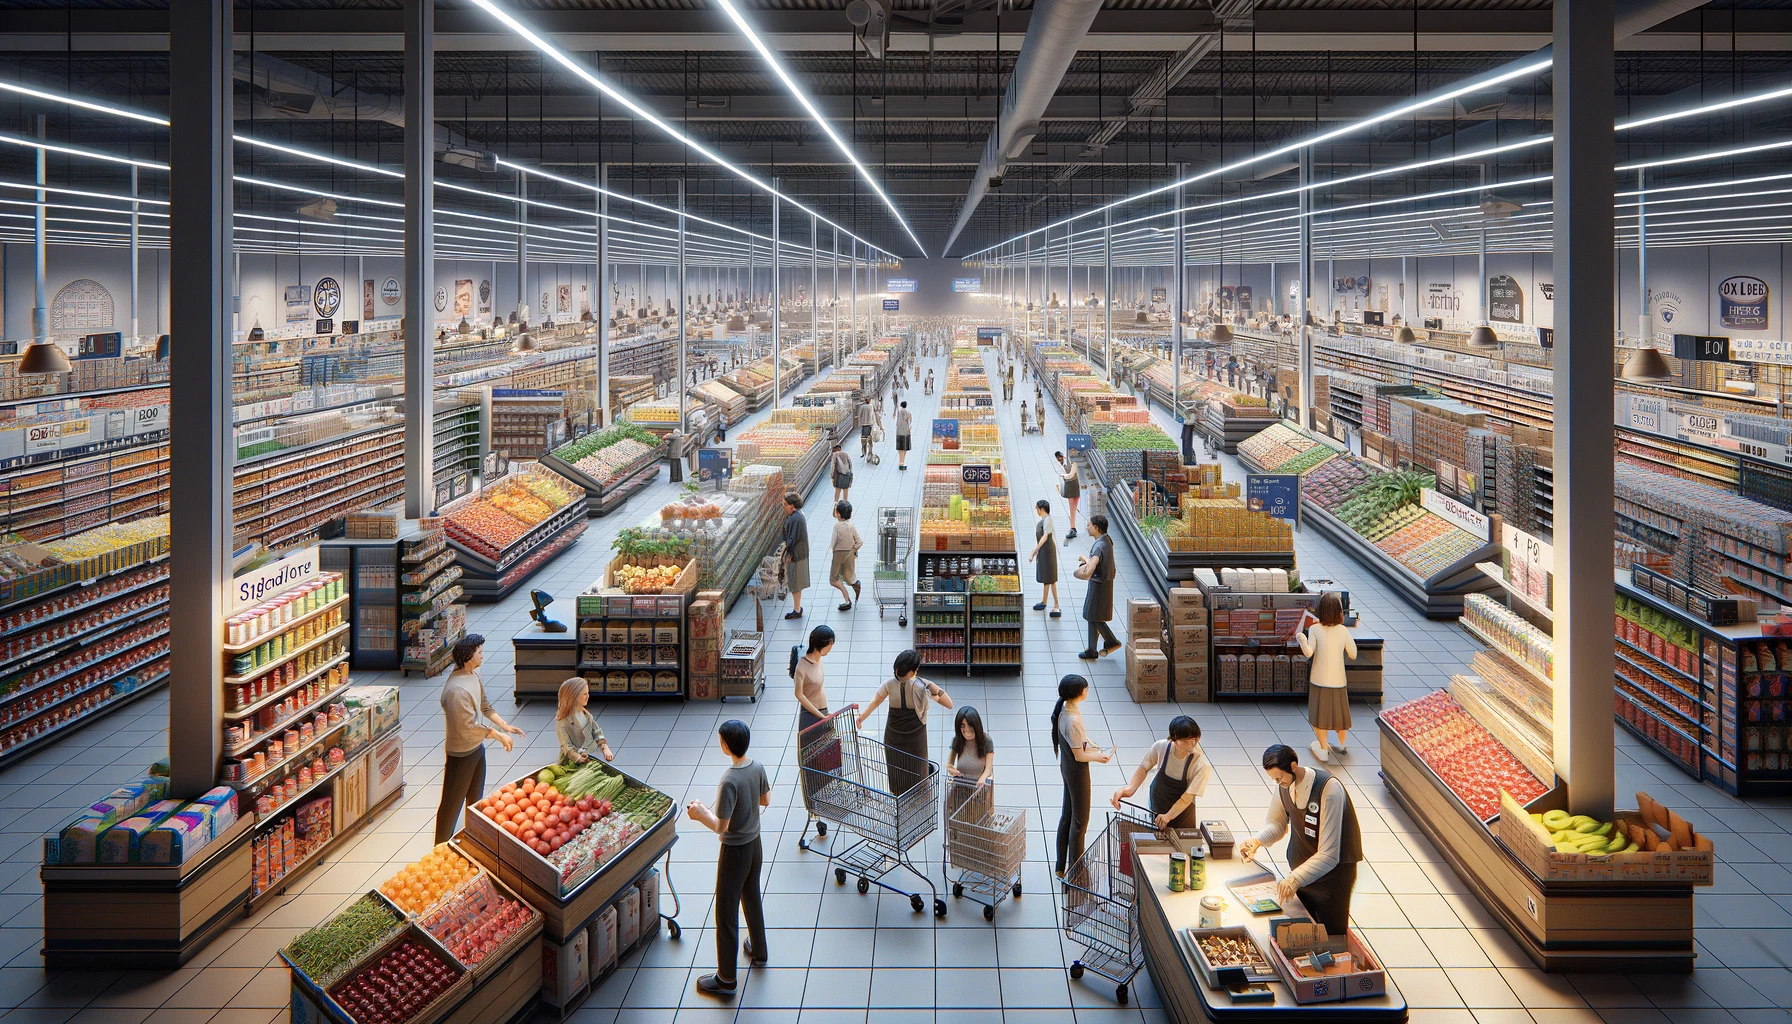

**Masoud Fattahi Bandpey ,May 2024**

In an age driven by technological advancement and fierce market competition, the significance of robust databases and analytical capabilities cannot be overstated. Effective execution begins with superior inputs, which in turn generate superior outputs. It is essential for businesses to adapt to increasing consumer demands and stay ahead in competitive markets by leveraging insights that add tangible value to customer interactions.

This demonstration details our approach to analyzing sales performance using a combination of Excel, SQL, and Power BI. Our methodology encompasses the six pivotal steps of data analysis: Ask, Prepare, Process, Analyze, Share, and Act.

## Step 1: Ask
The initial step involves defining the business problem, which in this case is identifying optimal products, regions, categories, and customer segments for the Superstore. This will help in focusing our efforts to either target or avoid certain areas to enhance profitability.

### Business Objectives:
- Optimizing profits.
- Identifying emerging market trends.
- Utilizing insights to formulate actionable recommendations.

### Deliverables:
- A concise summary of the business objectives.
- Comprehensive documentation detailing all data cleaning, manipulation, and analysis procedures.
- A dashboard that visualizes key findings and outcomes.
- Strategic recommendations based on the analysis.

## Step 2: Prepare
We start by sourcing and preparing our dataset, which is publicly available on Kaggle. It includes data spanning from January 3, 2014, to December 30, 2017, and consists of 9995 rows, with 9994 rows of pure data and one row for column headers. The dataset includes 793 customers and 21 different columns, such as Row ID, Order ID, Order Date, Ship Date, Ship Mode, and others, covering sales, quantities, discounts, and profits.

Despite the dataset's slightly outdated nature, it remains a reliable and comprehensive resource for analysis. Next, we clean the data using Excel, removing duplicates, filling missing values, and ensuring proper formatting for seamless integration into SQL for further analysis.

## Step 3: Process
The processing phase involves the detailed cleaning and preparation of the data in Excel. This step ensures that the data is free from inconsistencies and ready for deep analytical work:
- Verifying data consistency and structure.
- Employing conditional formatting to highlight and address missing data.
- Removing duplicate entries to maintain data integrity.
- Formatting columns to appropriate data types to facilitate analysis in SQL, such as converting sales and profits to currency formats and discounts to percentage formats.

After thorough processing, the dataset is well-prepared for complex queries and analysis in SQL, setting the stage for a comprehensive exploration of sales trends, customer behaviors, and operational efficiencies.

## Step 4: Analyze
In the analysis phase, we will delve into the key components of our dataset to address our business objectives using SQL queries within this Jupyter Notebook.

To facilitate the use of SQL, we will convert our CSV data into a SQLite database temporarily. This allows us to utilize the full power of SQL for complex queries and analysis directly in this notebook.

### Converting CSV to SQLite Database
To begin, ensure that the required libraries are installed:

```bash
!pip install pandas sqlalchemy


We will use Pandas to load the CSV file and then create a SQLite database from the DataFrame:

In [1]:
from sqlalchemy import create_engine
from sqlalchemy.engine import reflection
import datetime as dt
# Create an engine instance
engine = create_engine('sqlite:///superstore.db')

# Load data from CSV
import pandas as pd
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')  
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order Date']=df['Order Date'].dt.date
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Ship Date']=df['Ship Date'].dt.date
df.to_sql('superstore', con=engine, if_exists='replace', index=False)

# Use inspect to get the table names
from sqlalchemy import inspect
inspector = inspect(engine)
tables = inspector.get_table_names()
print(tables)

['superstore']


### Executing SQL Queries

With our data now available as a SQLite database, we can use the %sql magic command to perform SQL queries directly. First, load the SQL extension and connect to your SQLite database:

In [2]:
%load_ext sql
%sql sqlite:///superstore.db


Let’s check the first 5 rows to make sure it imported well.

In [3]:
%%sql
SELECT * FROM superstore LIMIT 4;


 * sqlite:///superstore.db
Done.


[(1, 'CA-2016-152156', '2016-11-08', '2016-11-11', 'Second Class', 'CG-12520', 'Claire Gute', 'Consumer', 'United States', 'Henderson', 'Kentucky', 42420, 'South', 'FUR-BO-10001798', 'Furniture', 'Bookcases', 'Bush Somerset Collection Bookcase', 261.96, 2, 0.0, 41.9136),
 (2, 'CA-2016-152156', '2016-11-08', '2016-11-11', 'Second Class', 'CG-12520', 'Claire Gute', 'Consumer', 'United States', 'Henderson', 'Kentucky', 42420, 'South', 'FUR-CH-10000454', 'Furniture', 'Chairs', 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back', 731.94, 3, 0.0, 219.582),
 (3, 'CA-2016-138688', '2016-06-12', '2016-06-16', 'Second Class', 'DV-13045', 'Darrin Van Huff', 'Corporate', 'United States', 'Los Angeles', 'California', 90036, 'West', 'OFF-LA-10000240', 'Office Supplies', 'Labels', 'Self-Adhesive Address Labels for Typewriters by Universal', 14.62, 2, 0.0, 6.8714),
 (4, 'US-2015-108966', '2015-10-11', '2015-10-18', 'Standard Class', 'SO-20335', "Sean O'Donnell", 'Consumer', 'United States', 'Fort Lauderdale', 'Florida', 33311, 'South', 'FUR-TA-10000577', 'Furniture', 'Tables', 'Bretford CR4500 Series Slim Rectangular Table', 957.5775, 5, 0.45, -383.031)]

Let's begin an exploratory data analysis on the Superstore dataset. We will tackle a series of tasks, each followed by a corresponding SQL query and its results. After completing our analysis, we will move on to creating a dashboard that visualizes the critical insights and solutions to the key business challenges we've identified.

#### **1. What are total sales and total profits of each year?**
The data is organized by the order date, allowing us to analyze the annual performance for the years 2014, 2015, 2016, and 2017.

In [4]:
%%sql
SELECT
    strftime('%Y', "Order Date") AS year,
    round(SUM(Sales),2) AS Total_Sales,
    round(SUM(Profit),2) AS Total_Profit
FROM superstore
GROUP BY Year
ORDER BY Year ASC limit 10;


 * sqlite:///superstore.db
Done.


[('2014', 484247.5, 49543.97),
 ('2015', 470532.51, 61618.6),
 ('2016', 609205.6, 81795.17),
 ('2017', 733215.26, 93439.27)]

The data indicates a consistent increase in profits year-over-year, with each successive year outperforming the previous one in profitability. This trend persisted even though there was a decline in sales in 2015, highlighting the resilience of our financial performance.

#### **2. What are the total profits and total sales per quarter?**
We analyze quarterly sales and profits to identify the periods when our company has had the greatest impact. This information allows us to strategically align our future operations, such as enhancing our advertising efforts, customer service, and overall presence during key times of the year. The following code accomplishes this analysis:

In [5]:
%%sql
SELECT
  strftime('%Y', "Order Date") AS year,
  CASE
    WHEN strftime('%m', "Order Date") IN ('01','02','03') THEN 'Q1'
    WHEN strftime('%m', "Order Date") IN ('04','05','06') THEN 'Q2'
    WHEN strftime('%m', "Order Date") IN ('07','08','09') THEN 'Q3'
    ELSE 'Q4'
  END AS quarter,
  round(SUM(sales),2) AS total_sales,
  round(SUM(profit),2) AS total_profit
FROM superstore
GROUP BY year, quarter
ORDER BY year, quarter
limit 20;


 * sqlite:///superstore.db
Done.


[('2014', 'Q1', 74447.8, 3811.23),
 ('2014', 'Q2', 86538.76, 11204.07),
 ('2014', 'Q3', 143633.21, 12804.72),
 ('2014', 'Q4', 179627.73, 21723.95),
 ('2015', 'Q1', 68851.74, 9264.94),
 ('2015', 'Q2', 89124.19, 12190.92),
 ('2015', 'Q3', 130259.58, 16853.62),
 ('2015', 'Q4', 182297.01, 23309.12),
 ('2016', 'Q1', 93237.18, 11441.37),
 ('2016', 'Q2', 136082.3, 16390.34),
 ('2016', 'Q3', 143787.36, 15823.6),
 ('2016', 'Q4', 236098.75, 38139.86),
 ('2017', 'Q1', 123144.86, 23506.2),
 ('2017', 'Q2', 133764.37, 15499.21),
 ('2017', 'Q3', 196251.96, 26985.13),
 ('2017', 'Q4', 280054.07, 27448.73)]

This table provides insights into which quarters were the most profitable for us from 2014 to 2017. These insights can guide our future investment and marketing strategies. We have computed the table in Excel, and the results are as follows:

#### **Most Performing Quarters from 2014-2017**

| Quarters (2014 - 2017) | Total Sales   | Total Profit  |
|------------------------|---------------|---------------|
| Q4                     | 878,077.66   | 110,621.93  |
| Q3                     | 613,932.06   | 72,476.32    |
| Q2                     | 445,509.71   | 55,284.80    |
| Q1                     | 359,681.64   | 48,023.74    |


The data presented clearly indicates that October, November, and December are our peak sales months, also yielding the highest profits. This pattern, reminiscent of a stock market rally, builds progressively from January to December and then typically declines in the first quarter of the year. With these insights, we can effectively formulate strategic operational plans. Now, let's examine the performance across different regions.

#### **3. What region generates the highest sales and profits ?**
This is solved with the code below:

In [6]:
%%sql
SELECT Region, round(SUM(Sales),2) AS Total_Sales,
round(SUM(Profit),2) AS Total_Profit
FROM superstore
GROUP BY Region
ORDER BY Total_Sales DESC, Total_Profit DESC;


 * sqlite:///superstore.db
Done.


[('West', 725457.82, 108418.45),
 ('East', 678781.24, 91522.78),
 ('Central', 501239.89, 39706.36),
 ('South', 391721.91, 46749.43)]

As observed from the data, the West region leads in both sales and profits, making it a prime focus for our business. The East region also shows promising performance, suggesting potential for further profit maximization and business expansion. Conversely, while the South region does not generate significant revenue, it still manages to achieve respectable profits. However, the Central region raises concerns; despite its higher revenue compared to the South, it fails to achieve comparable profits. This discrepancy makes it essential to monitor the Central region closely and consider reallocating resources to more profitable areas. Next, let's analyze the profit margins of each region to gain deeper insights.

In [7]:
%%sql
SELECT Region,
       ROUND((SUM(Profit) / SUM(Sales) * 100), 2) as Profit_Margin
FROM superstore
GROUP BY Region
ORDER BY Profit_Margin DESC;


 * sqlite:///superstore.db
Done.


[('West', 14.94), ('East', 13.48), ('South', 11.93), ('Central', 7.92)]

Profit margins represent a company's profitability, expressed as the percentage of revenue retained as profit. Observations indicate that both the West and East regions perform exceptionally well. Notably, the South region, despite generating less than half the revenue of the West, maintains a commendable profit margin of 11.93%, which is impressive. In contrast, the Central region's performance remains underwhelming. Let's proceed to examine the specific data for each region to gain deeper insights.

#### **4. What state and city brings in the highest sales and profits ?**
To answer the question "What state and city bring in the highest sales and profits?" you can use SQL queries to aggregate sales and profits by state and city, then order the results to find the top performers. Below, I'll provide example SQL queries to determine the state and city with the highest sales and profits.
This SQL query aggregates sales and profits by state and then orders the results to find the state with the highest total sales and profits:

In [8]:
%%sql
SELECT State, round(SUM(Sales),2) AS Total_Sales, 
round(SUM(Profit),2) AS Total_Profit
FROM superstore
GROUP BY State
ORDER BY Total_Profit DESC
LIMIT 5;


 * sqlite:///superstore.db
Done.


[('California', 457687.63, 76381.39),
 ('New York', 310876.27, 74038.55),
 ('Washington', 138641.27, 33402.65),
 ('Michigan', 76269.61, 24463.19),
 ('Virginia', 70636.72, 18597.95)]

Similarly, this query aggregates sales and profits by city within the top-performing state and orders the results to find the city with the highest sales and profits:

In [9]:
%%sql
SELECT City, round(SUM(Sales),2) AS Total_Sales, 
round(SUM(Profit),2) AS Total_Profit
FROM superstore
GROUP BY City
ORDER BY  Total_Profit DESC
LIMIT 5;


 * sqlite:///superstore.db
Done.


[('New York City', 256368.16, 62036.98),
 ('Los Angeles', 175851.34, 30440.76),
 ('Seattle', 119540.74, 29156.1),
 ('San Francisco', 112669.09, 17507.39),
 ('Detroit', 42446.94, 13181.79)]

#### **5. The relationship between discount and sales and the total discount per category**
To analyze the relationship between discounts and sales, as well as to compute the total discount offered per category, you can use SQL queries to extract and process the relevant data. Here's how you can approach this analysis:

**SQL Query to Analyze the Relationship Between Discount and Sales**

This SQL query will help you explore how discounts correlate with sales by calculating average sales for different discount levels.

In [10]:
%%sql
SELECT Discount, round(AVG(Sales),2) AS Avg_Sales
FROM superstore
GROUP BY Discount
ORDER BY Discount;


 * sqlite:///superstore.db
Done.


[(0.0, 226.74),
 (0.1, 578.4),
 (0.15, 529.97),
 (0.2, 209.08),
 (0.3, 454.74),
 (0.32, 536.79),
 (0.4, 565.13),
 (0.45, 498.63),
 (0.5, 892.71),
 (0.6, 48.15),
 (0.7, 97.18),
 (0.8, 56.55)]

**SQL Query to Compute Total Discount Per Category**

This SQL query will aggregate the total discounts given per product category, allowing you to see which categories have the highest discount impact.

In [11]:
%%sql
SELECT Category, ROUND(SUM(Discount),2) AS Total_Discount
FROM superstore
GROUP BY Category
ORDER BY Total_Discount DESC;


 * sqlite:///superstore.db
Done.


[('Office Supplies', 947.8), ('Furniture', 368.89), ('Technology', 244.4)]

**Visualizing the Data**

To further enhance the analysis, you can visualize these results using tools like matplotlib or seaborn in a Jupyter Notebook. Here’s an example of how you might visualize the relationship between discount and sales:

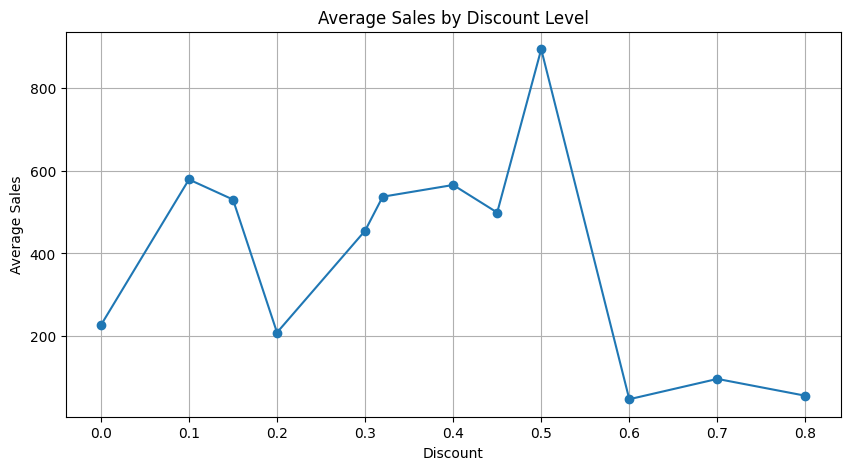

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'result' is the DataFrame
# obtained from the SQL query about discount and sales
result = pd.read_sql_query(
    "SELECT Discount, AVG(Sales) AS Avg_Sales FROM superstore GROUP BY Discount",
    engine
)


plt.figure(figsize=(10, 5))
plt.plot(result['Discount'], result['Avg_Sales'], marker='o')
plt.title('Average Sales by Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


##### **Analysis of Average Sales by Discount Level**

This graph illustrates how the average sales vary with different levels of discounts offered. The X-axis represents the discount level ranging from 0.0 (no discount) to 0.8 (80% discount), and the Y-axis represents the average sales in dollars.

#### **Key Observations:**

1. **Low to Moderate Discounts (0.0 to 0.3)**:
   - The sales figures start relatively high with no discount, suggesting strong baseline demand for some products regardless of discounting.
   - As the discount increases to 10%, there is a slight dip in sales, potentially indicating that the discount is not substantial enough to attract more buyers or that it affects the perceived value of the products.
   - Sales recover as discounts increase to 20% and 30%, highlighting a positive consumer response to these moderate discount levels.

2. **Higher Discounts (0.4 to 0.5)**:
   - The sales trend fluctuates slightly with higher discounts, peaking notably at a 50% discount. This peak could indicate an optimal discount rate where the price reduction significantly boosts demand without excessively diminishing revenue.

3. **Very High Discounts (0.6 to 0.8)**:
   - Beyond the 50% discount level, there is a sharp drop in average sales, particularly at 60% and 70% discounts, which could suggest that such deep discounts may negatively impact the product's perceived value or profitability.
   - The very low sales at 80% discount might reflect a point where the discount is so substantial that it either leads to stock clearance without much profit or affects consumer perception negatively.

#### **Implications for Strategic Pricing:**

The graph suggests that while moderate discounts can stimulate sales effectively, excessively high discounts may not yield proportionate increases in sales volume and can even be counterproductive. This insight can inform pricing strategies, where optimizing discount levels could balance attractiveness to consumers and profitability for the store.


#### **6. What category generates the highest sales and profits in each region and state ?**

Here's how you can find the necessary information using SQL

**SQL Query for Highest Sales and Profits per Category in Each Region**

In [13]:
%%sql
SELECT region, category, round(SUM(sales),2) AS total_sales, 
round(SUM(profit),2) AS total_profit
FROM superstore
GROUP BY region, category
ORDER BY total_profit DESC;


 * sqlite:///superstore.db
Done.


[('West', 'Office Supplies', 220853.25, 52609.85),
 ('East', 'Technology', 264973.98, 47462.04),
 ('West', 'Technology', 251991.83, 44303.65),
 ('East', 'Office Supplies', 205516.05, 41014.58),
 ('Central', 'Technology', 170416.31, 33697.43),
 ('South', 'Technology', 148771.91, 19991.83),
 ('South', 'Office Supplies', 125651.31, 19986.39),
 ('West', 'Furniture', 252612.74, 11504.95),
 ('Central', 'Office Supplies', 167026.42, 8879.98),
 ('South', 'Furniture', 117298.68, 6771.21),
 ('East', 'Furniture', 208291.2, 3046.17),
 ('Central', 'Furniture', 163797.16, -2871.05)]



This SQL query provides a comprehensive view of which categories generate the most sales and profits in each region. By grouping the data by `region` and `category`, we sum up the sales and profits for each combination, allowing us to identify which categories are the most lucrative in specific regions. This insight can be used to tailor regional sales strategies, optimize inventory distribution, and enhance marketing efforts to capitalize on regional strengths. The results are ordered by total profits in descending order to quickly highlight the top-performing categories in each region.


**SQL Query for Highest Sales and Profits per Category in Each State**

In [14]:
%%sql
SELECT state, category, ROUND(SUM(sales),2) AS total_sales,
ROUND(SUM(profit),2) AS total_profit
FROM superstore
GROUP BY state, category
ORDER BY total_profit DESC
limit 10;


 * sqlite:///superstore.db
Done.


[('New York', 'Technology', 127483.5, 42186.79),
 ('California', 'Office Supplies', 142351.95, 37748.38),
 ('California', 'Technology', 159271.08, 29470.04),
 ('New York', 'Office Supplies', 90020.04, 25994.08),
 ('Washington', 'Technology', 50536.71, 15019.34),
 ('Michigan', 'Office Supplies', 37723.76, 15005.33),
 ('Washington', 'Office Supplies', 40084.41, 11189.52),
 ('Indiana', 'Technology', 26323.25, 11000.88),
 ('Georgia', 'Office Supplies', 26715.81, 9800.93),
 ('California', 'Furniture', 156064.6, 9162.97)]


This SQL query aims to pinpoint which categories yield the highest sales and profits in each state. By summarizing and grouping the data by `state` and `category`, the query calculates the total sales and profits, providing a clear picture of category performance across different states. The ordering by descending profits helps identify priority categories that could benefit from focused marketing and sales initiatives. This analysis is crucial for making informed decisions on where to allocate resources effectively to maximize profitability at the state level.


#### **7. What subcategory generates the highest sales and profits in each region and state ?**

To find out which subcategory generates the highest sales and profits in each region and state, you'll need a SQL query that analyzes the data grouped by region, state, and subcategory, then determines which subcategory has the maximum sales and profits for each grouping.

**SQL Query for Highest Sales and Profits per Subcategory in Each Region**

In [15]:
%%sql
SELECT region, "Sub-Category", round(MAX(total_sales),2) AS highest_sales,
round(MAX(total_profit),2) AS highest_profit
FROM (
    SELECT region, "Sub-Category", SUM(sales) AS total_sales, 
    SUM(profit) AS total_profit
    FROM superstore
    GROUP BY region, "Sub-Category"
) AS subcategory_results
GROUP BY region
ORDER BY highest_profit DESC;


 * sqlite:///superstore.db
Done.


[('West', 'Copiers', 101781.33, 19327.24),
 ('East', 'Copiers', 100614.98, 17022.84),
 ('Central', 'Copiers', 85230.65, 15608.84),
 ('South', 'Phones', 58304.44, 10767.28)]

This query helps to identify which subcategories are the most successful in terms of sales and profits within each region. The results enable businesses to understand regional preferences and performance levels, facilitating targeted marketing strategies and inventory decisions based on regional demand for specific subcategories. This strategic insight supports optimizing resource allocation to enhance profitability in regions where certain subcategories perform exceptionally well.


**SQL Query for Highest Sales and Profits per Subcategory in Each State**

In [16]:
%%sql
SELECT state, "Sub-Category"bcategory, round(MAX(total_sales),2) AS highest_sales,
round(MAX(total_profit),2) AS highest_profit
FROM (
    SELECT state, "Sub-Category", SUM(sales) AS total_sales, 
    SUM(profit) AS total_profit
    FROM superstore
    GROUP BY state, "Sub-Category"
) AS subcategory_state_results
GROUP BY state
ORDER BY highest_profit DESC limit 10;


 * sqlite:///superstore.db
Done.


[('New York', 'Machines', 47502.62, 17320.08),
 ('California', 'Accessories', 67964.54, 11095.66),
 ('Michigan', 'Binders', 22821.97, 11079.51),
 ('Washington', 'Copiers', 25062.32, 9442.42),
 ('Indiana', 'Copiers', 18499.93, 8849.97),
 ('Minnesota', 'Binders', 12470.24, 6041.28),
 ('Georgia', 'Binders', 11672.32, 5717.31),
 ('Delaware', 'Copiers', 10499.97, 5039.99),
 ('Rhode Island', 'Copiers', 7399.87, 3491.94),
 ('Texas', 'Phones', 28589.57, 3222.46)]

By analyzing the performance of subcategories at the state level, this query provides crucial insights into which products are driving sales and generating profits in specific states. Understanding these dynamics helps in fine-tuning product offerings and marketing campaigns to cater to the unique preferences and demands of customers in different states. Such detailed analysis supports strategic decision-making to boost sales and profitability in targeted states.


#### **8. What are the names of the products that are the most and least profitable to us?**

To determine which products are the most and least profitable in your dataset, you can use SQL queries that will rank products based on their total profits.

**SQL Query for Most Profitable Products**

In [17]:
%%sql
SELECT "Product Name", round(SUM(profit),2) AS total_profit
FROM superstore
GROUP BY "Product Name"
ORDER BY total_profit DESC
LIMIT 10;


 * sqlite:///superstore.db
Done.


[('Canon imageCLASS 2200 Advanced Copier', 25199.93),
 ('Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind', 7753.04),
 ('Hewlett Packard LaserJet 3310 Copier', 6983.88),
 ('Canon PC1060 Personal Laser Copier', 4570.93),
 ('HP Designjet T520 Inkjet Large Format Printer - 24" Color', 4094.98),
 ('Ativa V4110MDD Micro-Cut Shredder', 3772.95),
 ('3D Systems Cube Printer, 2nd Generation, Magenta', 3717.97),
 ('Plantronics Savi W720 Multi-Device Wireless Headset System', 3696.28),
 ('Ibico EPK-21 Electric Binding System', 3345.28),
 ('Zebra ZM400 Thermal Label Printer', 3343.54)]

This analysis reveals the top-performing products in terms of profitability. Recognizing which products are most profitable allows the company to focus on promoting these items more aggressively, allocate more resources towards their production and sales, and perhaps even explore expanding their range. These products are likely well-aligned with customer needs and market trends, hence their high profitability.


**SQL Query for Least Profitable Products**

In [18]:
%%sql
SELECT "Product Name", round(SUM(profit),2) AS total_profit
FROM superstore
GROUP BY "Product Name"
ORDER BY total_profit ASC
LIMIT 10;


 * sqlite:///superstore.db
Done.


[('Cubify CubeX 3D Printer Double Head Print', -8879.97),
 ('Lexmark MX611dhe Monochrome Laser Printer', -4589.97),
 ('Cubify CubeX 3D Printer Triple Head Print', -3839.99),
 ('Chromcraft Bull-Nose Wood Oval Conference Tables & Bases', -2876.12),
 ('Bush Advantage Collection Racetrack Conference Table', -1934.4),
 ('GBC DocuBind P400 Electric Binding System', -1878.17),
 ('Cisco TelePresence System EX90 Videoconferencing Unit', -1811.08),
 ('Martin Yale Chadless Opener Electric Letter Opener', -1299.18),
 ('Balt Solid Wood Round Tables', -1201.06),
 ('BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables', -1148.44)]

Understanding which products yield the least profit is crucial for addressing potential issues in pricing, cost management, or market demand. This list can serve as a guide for deciding whether to discontinue, reprice, or reposition these products in the market. It may also prompt a review of the cost structures associated with these products to identify ways to enhance their profitability.


#### **9. What segment makes the most of our profits and sales ?**

To determine which segment generates the most sales and profits in your dataset, you can use a SQL query that sums up sales and profits for each segment and then ranks them to find out which one tops the list.

In [19]:
%%sql
SELECT segment, round(SUM(sales),2) AS total_sales, 
round(SUM(profit),2) AS total_profit
FROM superstore
GROUP BY segment
ORDER BY total_profit DESC;


 * sqlite:///superstore.db
Done.


[('Consumer', 1161401.34, 134119.21),
 ('Corporate', 706146.37, 91979.13),
 ('Home Office', 429653.15, 60298.68)]

This SQL query assesses the performance of different customer segments in generating sales and profits. By summing up and comparing these figures, we can identify which segment contributes most significantly to the company's bottom line.

This analysis is vital for understanding customer behavior and preferences. It helps in tailoring marketing strategies, optimizing product offerings, and possibly reallocating resources to enhance support and services for the most profitable segment. Knowing which segment is the most profitable also aids in predicting future trends and making strategic decisions to foster growth in that segment. Furthermore, this data can influence decisions about which segments may require more attention or strategy adjustments to improve their profitability.


#### **10. How many customers do we have (unique customer IDs) in total and how much per region and state?**

To find out the total number of unique customers as well as the distribution of these customers per region and state in your dataset, you can use SQL queries. These will help you analyze the customer base diversity and concentration geographically.

**SQL Query for Total Number of Unique Customers**

In [20]:
%%sql
SELECT COUNT(DISTINCT "Customer ID") AS total_customers
FROM superstore;


 * sqlite:///superstore.db
Done.


[(793,)]

This query provides the total count of unique customers that have purchased from the superstore. Understanding the size of the customer base is crucial for evaluating the reach of the business and the effectiveness of marketing strategies. A larger number of unique customers suggests a broad market presence and the successful acquisition of new customers.


**SQL Query for Unique Customers Per Region**

In [21]:
%%sql
SELECT region, COUNT(DISTINCT "Customer ID") AS customers_per_region
FROM superstore
GROUP BY region
ORDER BY customers_per_region DESC;


 * sqlite:///superstore.db
Done.


[('West', 686), ('East', 674), ('Central', 629), ('South', 512)]

**SQL Query for Unique Customers Per State**

In [22]:
%%sql
SELECT state, COUNT(DISTINCT "Customer ID") AS customers_per_state
FROM superstore
GROUP BY state
ORDER BY customers_per_state DESC limit 10;


 * sqlite:///superstore.db
Done.


[('California', 577),
 ('New York', 415),
 ('Texas', 370),
 ('Pennsylvania', 257),
 ('Illinois', 237),
 ('Washington', 224),
 ('Ohio', 202),
 ('Florida', 181),
 ('North Carolina', 122),
 ('Virginia', 107)]


These queries help identify which regions and states hold the highest and lowest concentrations of unique customers. Regions with more customers might indicate a successful market penetration and possibly higher demand. This data is essential for regional marketing efforts, resource allocation, and strategic planning to enhance customer engagement and expand market reach in under-served areas. Knowing where the customers are concentrated can also assist in optimizing logistics and supply chain strategies to better serve these key areas.


#### **11. Customer rewards program**
To develop insights for a customer rewards program, you can use SQL queries to analyze various aspects of customer engagement, such as total sales, total profits, and frequency of purchases. Here’s how you can structure these queries to identify key customers for the rewards program and to analyze their buying patterns

**SQL Query for Identifying Top Customers by Sales and Profits**

In [23]:
%%sql
SELECT "Customer ID", round(SUM(sales),2) AS total_sales,
round(SUM(profit),2) AS total_profit, COUNT("Order ID") AS number_of_orders
FROM superstore
GROUP BY "Customer ID"
ORDER BY total_sales DESC, total_profit DESC
LIMIT 20;


 * sqlite:///superstore.db
Done.


[('SM-20320', 25043.05, -1980.74, 15),
 ('TC-20980', 19052.22, 8981.32, 12),
 ('RB-19360', 15117.34, 6976.1, 18),
 ('TA-21385', 14595.62, 4703.79, 10),
 ('AB-10105', 14473.57, 5444.81, 20),
 ('KL-16645', 14175.23, 806.86, 29),
 ('SC-20095', 14142.33, 5757.41, 22),
 ('HL-15040', 12873.3, 5622.43, 11),
 ('SE-20110', 12209.44, 2650.68, 19),
 ('CC-12370', 12129.07, 2177.05, 11),
 ('TS-21370', 11891.75, 2371.71, 15),
 ('GT-14710', 11820.12, 2163.43, 29),
 ('BM-11140', 11789.63, -1659.96, 16),
 ('SV-20365', 11470.95, 1199.42, 32),
 ('CJ-12010', 11164.97, 858.74, 20),
 ('CL-12565', 10880.55, 1933.78, 28),
 ('ME-17320', 10663.73, 1859.47, 22),
 ('KF-16285', 10604.27, 1660.14, 18),
 ('BS-11365', 10501.65, 2616.06, 9),
 ('EH-13765', 10310.88, 1393.52, 32)]


This analysis identifies our most valuable customers based on their total sales and profits generated. These customers are vital to our business, contributing significantly to the bottom line. Recognizing and rewarding these customers can enhance loyalty, encourage repeat business, and increase customer lifetime value. The inclusion of the number of orders helps us to understand their purchasing frequency, further aiding in segmenting customers based on their engagement levels.


**SQL Query for Frequency of Purchases and Average Purchase Value**

In [24]:
%%sql
SELECT "Customer ID", COUNT("Order ID") AS number_of_orders, 
round(AVG(sales),2) AS average_order_value
FROM superstore
GROUP BY "Customer ID"
ORDER BY number_of_orders DESC
limit 20;


 * sqlite:///superstore.db
Done.


[('WB-21850', 37, 166.49),
 ('PP-18955', 34, 213.31),
 ('MA-17560', 34, 126.45),
 ('JL-15835', 34, 288.23),
 ('SV-20365', 32, 358.47),
 ('JD-15895', 32, 237.84),
 ('EH-13765', 32, 322.22),
 ('CK-12205', 32, 98.59),
 ('ZC-21910', 31, 258.89),
 ('EP-13915', 31, 176.71),
 ('AP-10915', 31, 107.21),
 ('LC-16870', 30, 86.02),
 ('SH-19975', 29, 117.48),
 ('KL-16645', 29, 488.8),
 ('GT-14710', 29, 407.59),
 ('Dp-13240', 29, 248.23),
 ('BM-11650', 29, 251.52),
 ('XP-21865', 28, 84.81),
 ('KM-16720', 28, 175.34),
 ('KD-16495', 28, 292.19)]


Understanding the purchase frequency and the average spending per order of our customers provides insights into their buying behavior. Customers who frequently order or those who spend a lot per transaction are ideal candidates for a rewards program as they demonstrate high engagement and value to the store. Targeting these customers with special offers, discounts, or loyalty points can motivate continued engagement and potentially increase their average spend.


#### **12. Average shipping time per class and in total**

Finally, the average shipping time regardless of the shipping mode that is chosen is found with the following function:

**SQL Query for Overall Average Shipping Time**

In [25]:
%%sql
SELECT round(AVG(julianday("Ship Date") - julianday("Order Date")),1) 
AS avg_shipping_time
FROM superstore;


 * sqlite:///superstore.db
Done.


[(4.0,)]

The shipping time in each shipping mode is:

In [26]:
%%sql
SELECT
  "Ship Mode",
  ROUND(AVG(julianday("Ship Date") - julianday("Order Date")), 1) 
    AS avg_shipping_time
FROM
  superstore
GROUP BY
  "Ship Mode"
ORDER BY
  avg_shipping_time;


 * sqlite:///superstore.db
Done.


[('Same Day', 0.0),
 ('First Class', 2.2),
 ('Second Class', 3.2),
 ('Standard Class', 5.0)]

## Step 4: Conclusions and Recommendations for Superstore Success

- **Profit Trends:** Our profits have shown consistent improvement over time, despite a brief halt in 2015. It's crucial to maintain this upward trajectory.
  
- **Quarterly Performance:** Q4 consistently stands out as our most profitable quarter. To maximize profits further, adequate stock levels and intensified marketing efforts during the festive period (October — December) are imperative.
  
- **Regional Performance:** The West region leads in profitability, followed by East, South, and Central regions. Despite the Central region's higher sales compared to the South, it lags in profitability. Shifting resources from Central to West region stores could enhance overall profitability.
  
- **Market Focus:** California, New York, and Washington emerge as our most profitable markets, while Texas, Ohio, and Pennsylvania are least profitable. Consider reducing presence or halting operations in underperforming markets.
  
- **City Prioritization:** New York City, Los Angeles, and Seattle are our most profitable cities, warranting prioritized focus. Conversely, Philadelphia, Houston, and San Antonio incur significant losses, indicating the need for strategic reassessment.
  
- **Category Analysis:** Technology and Office Supplies exhibit the highest profitability, suggesting a need for increased investment. Furniture, while still profitable, requires attention to improve overall performance.
  
- **Regional Category Focus:** Office supplies in the West and East regions yield maximum profits, necessitating increased availability. Conversely, furniture in the Central region underperforms, suggesting a reallocation of resources to more profitable regions.
  
- **Statewise Strategy:** Technology and Office Supplies drive profits in New York and California, emphasizing the importance of expanding these offerings in these states. Conversely, certain products in Texas, Ohio, and Illinois yield substantial losses, indicating the need for reduced stock.
  
- **Subcategory Performance:** Copiers, Phones, Accessories, and Paper generate significant profits nationwide. Conversely, Tables, Bookcases, and Supplies consistently underperform, requiring reduced investment.
  
- **Subcategory Focus by Region:** Certain products, like Copiers in the West and East, yield consistent profits and should be prioritized. Conversely, Tables in multiple regions result in losses, suggesting a need for redirection of resources.
  
- **Subcategory Analysis by State:** Machines, Phones, and Binders perform well in New York, while Texas and Illinois exhibit losses in certain categories. Tailoring product offerings based on regional performance is essential.
  
- **Product-specific Strategy:** High-profit products like the Canon imageClass 2200 Advanced Copier warrant consistent stock maintenance, while low-performing products such as the Cubify CubeX 3D Printer Triple Head Print should be discontinued.
  
- **Segment Analysis:** The consumer segment proves most profitable, followed by Corporate and Home office segments. Despite profitability across all segments, prioritizing the consumer segment is recommended.
  
- **Clientele Focus:** With the highest customer count in California, New York, and Texas, strategic decisions regarding the Texas market are crucial due to its substantial losses. California and New York require sustained excellence to maintain market leadership.

Thank you for your attention and dedication to our discussion!


### Appendix :

Some examples of visualization by Power BI for better understanding of concepts:

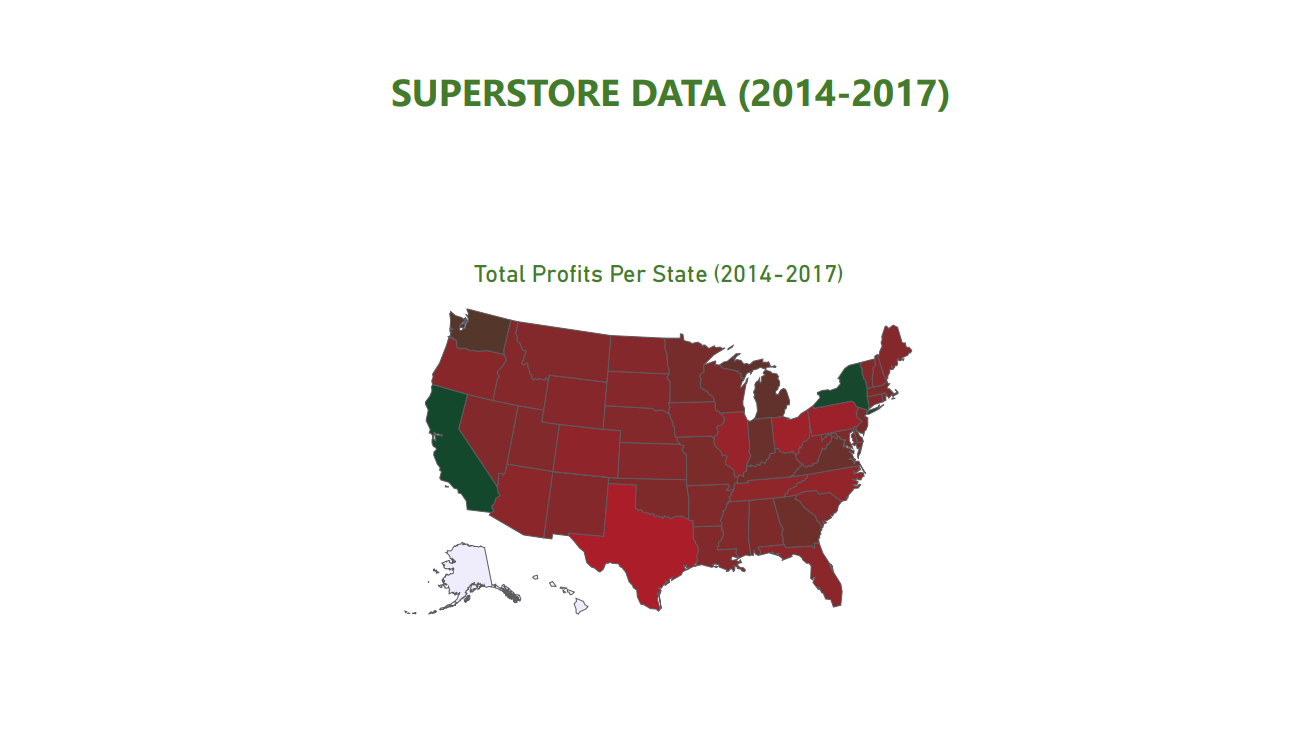

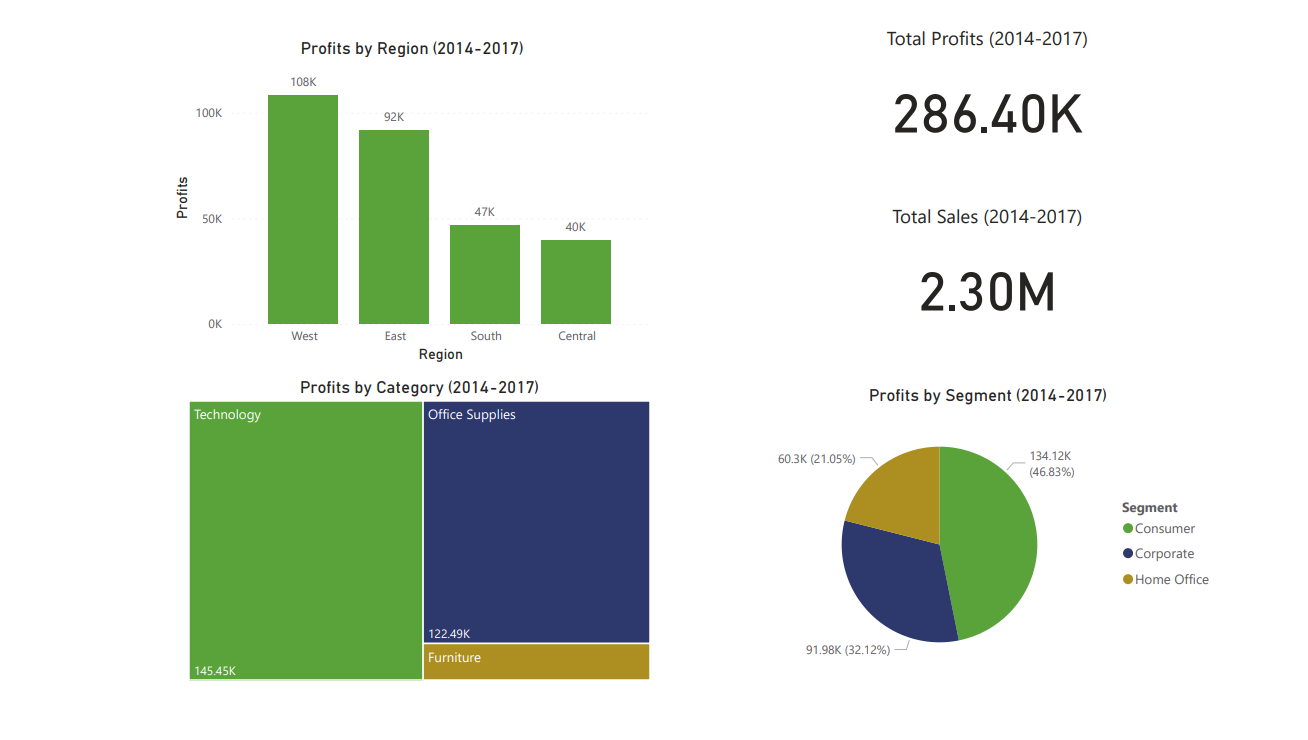

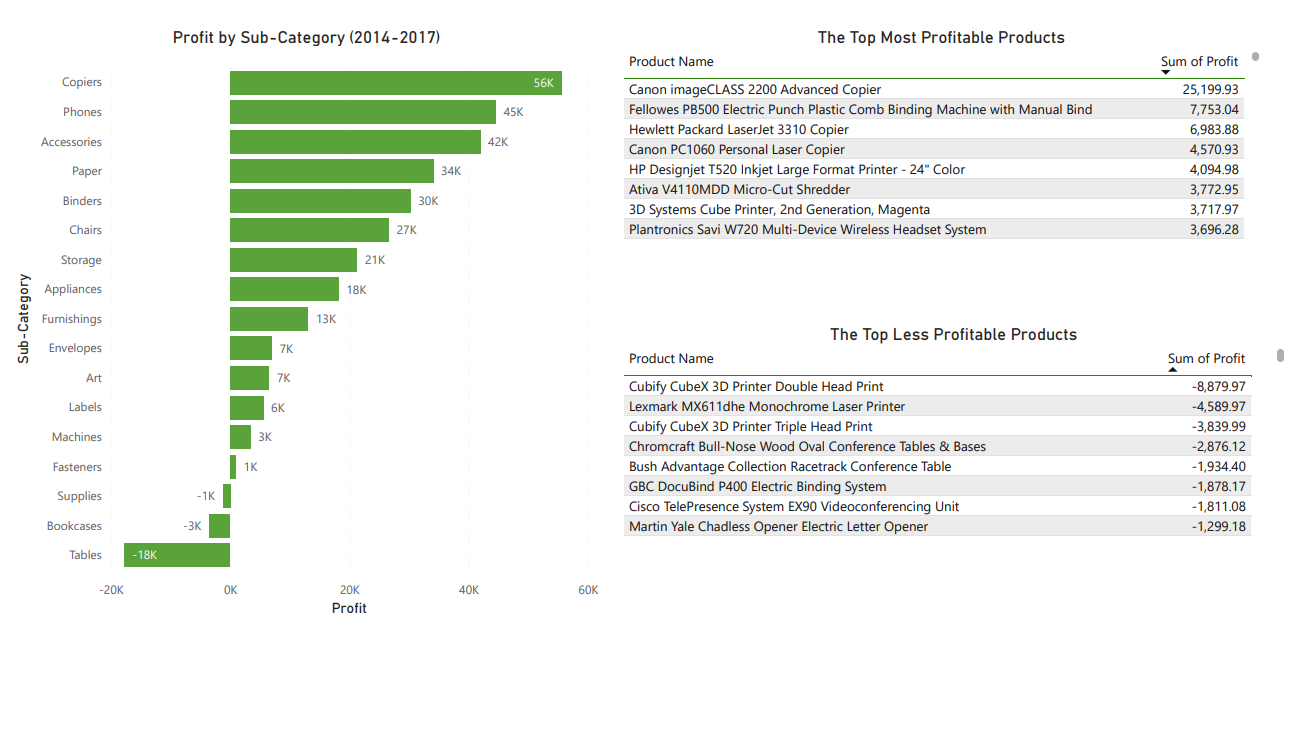